<a href="https://colab.research.google.com/github/siddhantkd/Handwritten_Digit_Classification/blob/main/mnist_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REFERENCE : 

1. https://towardsdatascience.com/understanding-residual-networks-9add4b664b03 RESNET MODEL

2. https://datascience.stackexchange.com/questions/46124/what-do-compile-fit-and-predict-do-in-keras-sequential-models Mnist, pre processing, model fitting



In [13]:
import keras
from keras.datasets import mnist

from keras.models import Model,Input

from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,AveragePooling2D,Dropout,BatchNormalization,Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K

In [2]:
#Loading the data and Pre processing
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
# The known number of output classes.
num_classes = 10

# Input image dimensions
img_rows, img_cols = 28, 28

# Channels go last for TensorFlow backend
x_train_reshaped = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test_reshaped = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# Convert class vectors to binary class matrices. This uses 1 hot encoding.
y_train_binary = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test_binary = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [7]:
y_test_binary[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [8]:
#Resnet Unit

def Unit(x,filters,pool=False):
    res = x
    if pool:
        x = MaxPooling2D(pool_size=(2, 2))(x)
        res = Conv2D(filters=filters,kernel_size=[1,1],strides=(2,2),padding="same")(res)
    out = BatchNormalization()(x)
    out = Activation("relu")(out)
    out = Conv2D(filters=filters, kernel_size=[3, 3], strides=[1, 1], padding="same")(out)

    out = BatchNormalization()(out)
    out = Activation("relu")(out)
    out = Conv2D(filters=filters, kernel_size=[3, 3], strides=[1, 1], padding="same")(out)

    out = keras.layers.add([res,out])

    return out

In [9]:
#Define the model(RESNET MODEL stacking up the units)


def MiniModel(input_shape):
    images = Input(input_shape)
    net = Conv2D(filters=32, kernel_size=[3, 3], strides=[1, 1], padding="same")(images)
    net = Unit(net,32)
    net = Unit(net,64,pool=True)
    net = BatchNormalization()(net)
    net = Activation("relu")(net)
    net = Dropout(0.25)(net)

    net = AveragePooling2D(pool_size=(4,4))(net)
    net = Flatten()(net)
    net = Dense(units=10,activation="softmax")(net)

    model = Model(inputs=images,outputs=net)

    return model

In [14]:
model = MiniModel(input_shape)

In [15]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   320         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 28, 28, 32)   128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 28, 28, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [16]:
#Specify the training components
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [20]:
# Save the model
#model_json = model.to_json()
#with open("weights/model.json", "w") as json_file:
 #   json_file.write(model_json)

In [19]:
epochs = 4
batch_size = 128
# Fit the model weights.
model.fit(x_train_reshaped, y_train_binary,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_reshaped, y_test_binary))

Epoch 1/4
469/469 [==============================] - 351s 746ms/step - loss: 0.1457 - accuracy: 0.9668 - val_loss: 0.2942 - val_accuracy: 0.9131
Epoch 2/4
469/469 [==============================] - 355s 757ms/step - loss: 0.0375 - accuracy: 0.9886 - val_loss: 0.0416 - val_accuracy: 0.9871
Epoch 3/4
469/469 [==============================] - 354s 754ms/step - loss: 0.0289 - accuracy: 0.9912 - val_loss: 0.0567 - val_accuracy: 0.9810
Epoch 4/4
469/469 [==============================] - 353s 752ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.0472 - val_accuracy: 0.9849


In [27]:
accuracy = model.evaluate(x=x_test_reshaped,y=y_test_binary,batch_size=128)


79/79 [==============================] - 13s 164ms/step - loss: 0.0472 - accuracy: 0.9849


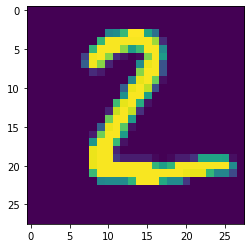

In [36]:
import matplotlib.pyplot as plt
plt.imshow(x_test[1])

In [37]:
y_test[1]

2

In [38]:
y_test_binary[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)